<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li>
        <li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Цель проекта</a></span></li>
        <li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Описание данных</a></span></li>
        <li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span>
            <ul class="toc-item">
                <li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод по разделу</a></span></li>
            </ul>
        </li>
        <li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span>
            <ul class="toc-item">
                <li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод по разделу</a></span></li>
            </ul>
        </li>
        <li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li>
        <li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод по проекту</a></span></li>
        <li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li>
    </ul>
</div>

# Выбор локации для скважины

## Описание проекта
Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.
Шаги для выбора локации обычно такие:
-	В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
-	Строят модель для предсказания объёма запасов в новых скважинах;
-	Выбирают скважины с самыми высокими оценками значений;
-	Определяют регион с максимальной суммарной прибылью отобранных скважин.
<br>
<br>
Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов.

## Цель проекта
Построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой <i>Bootstrap</i>.

## Описание данных

<ul style="border:solid black 2px; padding: 20px">
    <li><i>id</i> — уникальный идентификатор скважины;</li>
    <li><i>f0, f1, f2</i> — три признака точек (неважно, что они означают, но сами признаки значимы);</li>
    <li><i>product</i> — объём запасов в скважине (тыс. баррелей).</li>
</ul>

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from numpy.random import RandomState
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

<b>Рассмотрим первый регион</b>

In [ ]:
display(df0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
print(df0.duplicated().sum())

0


In [ ]:
df0['id'].value_counts()

bsk9y    2
AGS9W    2
Tdehs    2
QcMuo    2
fiKDv    2
        ..
T4eAp    1
s0hVr    1
3t4RR    1
q5x7m    1
g3cjL    1
Name: id, Length: 99990, dtype: int64

In [ ]:
df0['product'].describe()

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

<b>Распределение объемов запасов в скважинах первого региона</b>

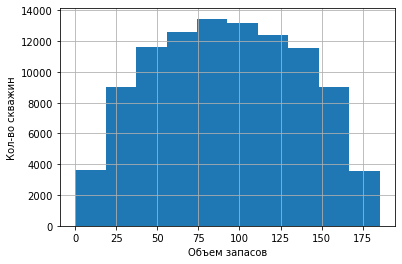

In [ ]:
df0['product'].hist()
plt.xlabel('Объем запасов')
plt.ylabel('Кол-во скважин')
plt.show()

<b>Преобладают скважины объемом в районе 90 тыс. баррелей</b>

<b>Рассмотрим зависимости между данными<b>

In [ ]:
corrMatrix0 = df0.corr()

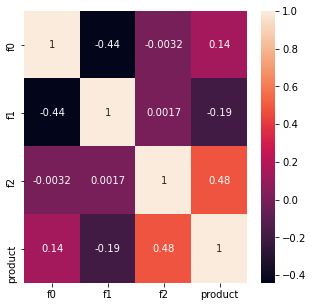

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(corrMatrix0, annot=True)
plt.show()

<b>Рассмотрим второй регион</b>

In [ ]:
display(df1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
print(df1.duplicated().sum())

0


In [ ]:
df1['id'].value_counts()

bfPNe    2
LHZR0    2
wt4Uk    2
5ltQ6    2
2BCkA    1
        ..
2JpXc    1
Ki9EX    1
skZyE    1
P8oMT    1
sN0bs    1
Name: id, Length: 99996, dtype: int64

In [ ]:
df1['product'].describe()

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

<b>Распределение объемов запасов в скважинах второго региона</b>

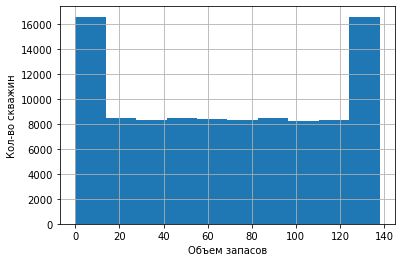

In [ ]:
df1['product'].hist()
plt.xlabel('Объем запасов')
plt.ylabel('Кол-во скважин')
plt.show()

<b>Преобладают скважины объемом до 15 и от 125 до 138 тыс. баррелей</b>

<b>Рассмотрим зависимости между данными<b>

In [ ]:
corrMatrix1 = df1.corr()

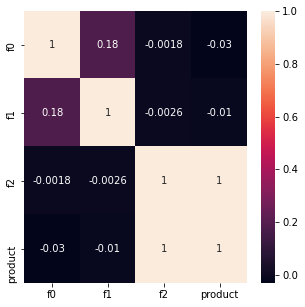

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(corrMatrix1, annot=True)
plt.show()

<b>Заметим сильную зависимость между признаком 'f2' и 'product'</b>

<b>Рассмотрим третий регион</b>

In [ ]:
display(df2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
print(df2.duplicated().sum())

0


In [ ]:
df2['id'].value_counts()

Vcm5J    2
xCHr8    2
VF7Jo    2
KUPhW    2
2jXbJ    1
        ..
82ujK    1
zTF9x    1
YFSk8    1
io162    1
kzNeo    1
Name: id, Length: 99996, dtype: int64

In [ ]:
df2['product'].describe()

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

<b>Распределение объемов запасов в скважинах третьего региона</b>

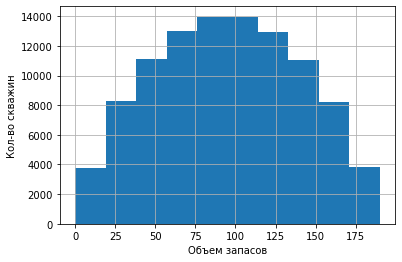

In [ ]:
df2['product'].hist()
plt.xlabel('Объем запасов')
plt.ylabel('Кол-во скважин')
plt.show()

<b>Преобладают скважины объемом в районе 95 тыс. баррелей</b>

<b>Рассмотрим зависимости между данными<b>

In [ ]:
corrMatrix2 = df2.corr()

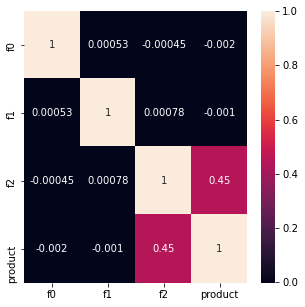

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(corrMatrix2, annot=True)
plt.show()

## Обучение и проверка модели

<b>Разобьем данные на обучающую и валидационную выборки в соотношении 75:25 для каждого региона</b>

In [ ]:
df0_train, df0_valid = train_test_split(df0, test_size=0.25, random_state=42)
df1_train, df1_valid = train_test_split(df1, test_size=0.25, random_state=42)
df2_train, df2_valid = train_test_split(df2, test_size=0.25, random_state=42)

<b>Обучающая и валидационная выборки первого региона</b>

In [ ]:
features_train0 = df0_train.drop(['id','product'], axis=1)
target_train0  = df0_train['product']

features_valid0 = df0_valid.drop(['id','product'], axis=1)
target_valid0 = df0_valid['product']

<b>Проверим размерность</b>

In [ ]:
print(features_train0.shape)
print(target_train0.shape)

print(features_valid0.shape)
print(target_valid0.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


<b>Обучающая и валидационная выборки второго региона</b>

In [ ]:
features_train1 = df1_train.drop(['id','product'], axis=1)
target_train1  = df1_train['product']

features_valid1 = df1_valid.drop(['id','product'], axis=1)
target_valid1 = df1_valid['product']

In [ ]:
print(features_train1.shape)
print(target_train1.shape)

print(features_valid1.shape)
print(target_valid1.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


<b>Обучающая и валидационная выборки третьего региона</b>

In [ ]:
features_train2 = df2_train.drop(['id','product'], axis=1)
target_train2  = df2_train['product']

features_valid2 = df2_valid.drop(['id','product'], axis=1)
target_valid2 = df2_valid['product']

In [ ]:
print(features_train2.shape)
print(target_train2.shape)

print(features_valid2.shape)
print(target_valid2.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


<b>Осуществим поиск параметров методом GridSearch</b>

In [ ]:
fit_intercept = [True, False]
normalize = [True, False]
n_jobs = [-1,1,2,3,None]
positive = [True, False]
copy_X = [True, False]
param_grid = {'fit_intercept': fit_intercept,
               'normalize': normalize,
               'n_jobs': n_jobs,
               'positive': positive,
               'copy_X': copy_X}
gs_reg = GridSearchCV(LinearRegression(), param_grid)
gs_reg.fit(features_train0,target_train0)
gs_reg.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': True,
 'positive': False}

<b>Обучим модель линейной регрессии и сделаем предсказания на валидационной выборке для каждого региона</b>

In [ ]:
model = LinearRegression(normalize=True, n_jobs= -1, copy_X=True, fit_intercept=True, positive=False) 

In [ ]:
def work_model(features_train,target_train,features_valid):
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    return predictions_valid

In [ ]:
predictions_valid0 = work_model(features_train0,target_train0,features_valid0)

mse0 = mean_squared_error(target_valid0,predictions_valid0)
rmse0 = mse0 ** 0.5
print('_______________________________________________________________________________')
print('Средний запас предсказанного сырья на валидационной выборке:',predictions_valid0.mean())
print('Среднеквадратичное отклонение:',mse0)
print('RMSE:',rmse0)
print('_______________________________________________________________________________')

_______________________________________________________________________________
Средний запас предсказанного сырья на валидационной выборке: 92.3987999065777
Среднеквадратичное отклонение: 1425.5608700093812
RMSE: 37.75660035026169
_______________________________________________________________________________


In [ ]:
predictions_valid1 = work_model(features_train1,target_train1,features_valid1)

mse1 = mean_squared_error(target_valid1,predictions_valid1)
rmse1 = mse1 ** 0.5
print('_______________________________________________________________________________')
print('Средний запас предсказанного сырья на валидационной выборке:',predictions_valid1.mean())
print('Среднеквадратичное отклонение:',mse1)
print('RMSE:',rmse1)
print('_______________________________________________________________________________')

_______________________________________________________________________________
Средний запас предсказанного сырья на валидационной выборке: 68.71287803913762
Среднеквадратичное отклонение: 0.7925986566392055
RMSE: 0.8902801001028864
_______________________________________________________________________________


In [ ]:
predictions_valid2 = work_model(features_train2,target_train2,features_valid2)

mse2 = mean_squared_error(target_valid2,predictions_valid2)
rmse2 = mse2 ** 0.5
print('_______________________________________________________________________________')
print('Средний запас предсказанного сырья на валидационной выборке:',predictions_valid2.mean())
print('Среднеквадратичное отклонение:',mse2)
print('RMSE:',rmse2)
print('_______________________________________________________________________________')

_______________________________________________________________________________
Средний запас предсказанного сырья на валидационной выборке: 94.7710238776594
Среднеквадратичное отклонение: 1611.6910636385903
RMSE: 40.145872311342174
_______________________________________________________________________________


### Вывод по разделу
1. Разбили выборки на обучающую и валидационную выборки в соотношении 75:25 для каждого региона.
2. Для обучения модели использовали Линейную регрессию.
3. Рассчитали средний запас предсказанного сырья. Оказалось, что модель спрогнозировала наибольший средний запас в третьем регионе.
4. Рассчитали RMSE для каждого региона. В результате рассчетов лучший показатель качества модели оказался у второго региона. 
<br>
<table width="30%" align="left">
    <tr>
        <th>Регион</th>
        <th>Средний предсказанный запас</th>
        <th>RMSE</th>
    </tr>
    <tr>
        <th>Первый</th>
        <th>92.3987</th>
        <th>37.7566</th>
    </tr>
     <tr>
        <th>Второй</th>
        <th>68.7128</th>
        <th>0.8902</th>
    </tr>
    <tr>
        <th>Третий</th>
        <th>94.7710</th>
        <th>40.1458</th>
    </tr>
</table>

<b>Проверка на вменяемость</b>

In [ ]:
predictions0 = pd.Series(target_train0.mean(), index=target_train0.index)
mse0p = mean_squared_error(target_train0,predictions0)
rmse0p = mse0p ** 0.5
print(target_train0.mean())
print(mse0p)
print(rmse0p)

92.5580145430521
1961.8047043112817
44.292264610327635


In [ ]:
predictions1 = pd.Series(target_train1.mean(), index=target_train1.index)
mse1p = mean_squared_error(target_train1,predictions1)
rmse1p = mse1p ** 0.5
print(target_train1.mean())
print(mse1p)
print(rmse1p)

68.85820641762152
2110.849949589052
45.94398708850868


In [ ]:
predictions2 = pd.Series(target_train2.mean(), index=target_train2.index)
mse2p = mean_squared_error(target_train2,predictions2)
rmse2p = mse2p ** 0.5
print(target_train2.mean())
print(mse2p)
print(rmse2p)

94.94966697609381
2001.5515587257687
44.73870314085745


## Подготовка к расчёту прибыли

In [ ]:
BUDGET = 10 # 10 млрд. рублей на разработку скважин в регионе
RESEARCH_POINT = 500 # исследуем 500 точек
RESEARCH_POINT_BEST = 200 # выбирают 200 точек
PROFIT = 0.00045 # 450 тыс. рублей за 1 тыс. баррелей

<b>Расчет достаточного объема сырья для безубыточной разработки новой скважины</b>

In [ ]:
optimal_volume = BUDGET / PROFIT / RESEARCH_POINT_BEST
print('Достаточный объем сырья для безубыточной разработки новой скважины (тыс. баррелей):',optimal_volume)

Достаточный объем сырья для безубыточной разработки новой скважины (тыс. баррелей): 111.11111111111111


<b>Расчет среднего запаса сырья в каждом регионе</b>

In [ ]:
print('Средний запас в регионе 1:',df0['product'].mean())
print('Средний запас в регионе 2:',df1['product'].mean())
print('Средний запас в регионе 3:',df2['product'].mean())

Средний запас в регионе 1: 92.49999999999974
Средний запас в регионе 2: 68.82500000002561
Средний запас в регионе 3: 95.00000000000041


### Вывод по разделу
Средний объем запасов в регионах намного ниже, чем значение достаточного объема сырья для безубыточной разработки новой скважины. В дальнейшем придется разобраться, что с этим делать. Неужели придется забраковать все регионы. Тем более рассчет среднего производился, учитывая все скважины по каждому региону. А скважины встречаюстя как без сырья, либо его очень мало.

## Расчёт прибыли и рисков 

In [ ]:
data0 = pd.DataFrame({'target_valid':target_valid0,'predictions_valid':predictions_valid0})
data1 = pd.DataFrame({'target_valid':target_valid1,'predictions_valid':predictions_valid1})
data2 = pd.DataFrame({'target_valid':target_valid2,'predictions_valid':predictions_valid2})

In [ ]:
display(data0)

,target_valid,predictions_valid
75721,122.073350,101.901017
80184,48.738540,78.217774
19864,131.338088,115.266901
76699,88.327757,105.618618
92991,36.959266,97.980185
...,...,...
21271,148.821520,105.076959
34014,123.454003,74.768176
81355,91.945213,82.544397
65720,149.295563,81.826689


In [ ]:
target0 = data0['target_valid']
pred0 = data0['predictions_valid']

In [ ]:
display(data1)

,target_valid,predictions_valid
75721,0.000000,0.844738
80184,53.906522,52.921612
19864,134.766305,135.110385
76699,107.813044,109.494863
92991,0.000000,-0.047292
...,...,...
21271,107.813044,108.351600
34014,53.906522,53.604049
81355,26.953261,26.708734
65720,110.992147,109.823087


In [ ]:
target1 = data1['target_valid']
pred1 = data1['predictions_valid']

In [ ]:
display(data2)

,target_valid,predictions_valid
75721,117.441301,98.301916
80184,47.841249,101.592461
19864,45.883483,52.449099
76699,139.014608,109.922127
92991,84.004276,72.411847
...,...,...
21271,40.797226,102.764169
34014,87.144239,93.431823
81355,52.039812,64.098390
65720,136.961454,83.764135


In [ ]:
target2 = data2['target_valid']
pred2 = data2['predictions_valid']

<b>Функция расчета прибыли по выбранным скважинам и предсказаниям модели</b>

<b>Выбираем 200 скважин с максимальным значений предсказаний</b>

In [ ]:
def calcut_profit(target,predictions,count):
    sort_pred = predictions.sort_values(ascending = False)[:count]
    result = (target[sort_pred.index].sum() * PROFIT) - BUDGET 
    return result

In [ ]:
profit_region_0 = calcut_profit(target0,pred0,RESEARCH_POINT_BEST)
print('Прибыль у региона номер 1 в млрд:',profit_region_0)
print('_______________________________________________________________________________')

Прибыль у региона номер 1 в млрд: 3.3591411144621794
_______________________________________________________________________________


In [ ]:
profit_region_1 = calcut_profit(target1,pred1,RESEARCH_POINT_BEST)
print('Прибыль у региона номер 2 в млрд:',profit_region_1)
print('_______________________________________________________________________________')

Прибыль у региона номер 2 в млрд: 2.415086696681511
_______________________________________________________________________________


In [ ]:
profit_region_2 = calcut_profit(target2,pred2,RESEARCH_POINT_BEST)
print('Прибыль у региона номер 3 в млрд:',profit_region_2)
print('_______________________________________________________________________________')

Прибыль у региона номер 3 в млрд: 2.598571759374112
_______________________________________________________________________________


<b>Применим технику Bootstrap, чтобы найти распределение прибыли</b>

In [ ]:
state = np.random.RandomState(42)

def distribution_profit(target,pred):
    for i in range(1000):
        target_subsample = target.sample(n = RESEARCH_POINT, random_state=state, replace=False)
        pred_subsample = pred[target_subsample.index]
        calcut = calcut_profit(target_subsample,pred_subsample,RESEARCH_POINT_BEST)
        values.append(calcut)
    return  values

<b>Распределение прибыли первого региона</b>

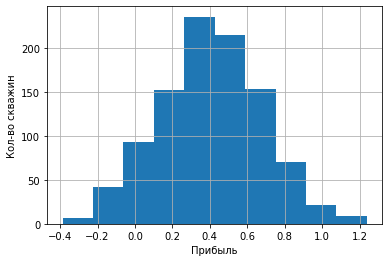

In [ ]:
values = []
values0 = pd.Series(distribution_profit(target0,pred0))
values0.hist()
plt.xlabel('Прибыль')
plt.ylabel('Кол-во скважин')
plt.show()

In [ ]:
values0.describe()

count    1000.000000
mean        0.408515
std         0.274673
min        -0.386922
25%         0.218009
50%         0.411835
75%         0.592846
max         1.239509
dtype: float64

In [ ]:
mean0 = values0.mean()
lower0 = values0.quantile(0.025)
upper0 = values0.quantile(0.975)
risk0 = st.percentileofscore(values0, 0)
print('_______________________________________________________________________________')
print('Средняя прибыль первого региона млрд:',mean0)
print('95% - ый доверительный интервал:')
print('0.025% - ый квантиль',lower0)
print('0.975% - ый квантиль',upper0)
print('Вероятность убытков:',risk0,'%')
print('_______________________________________________________________________________')

_______________________________________________________________________________
Средняя прибыль первого региона млрд: 0.4085150538838965
95% - ый доверительный интервал:
0.025% - ый квантиль -0.1386784938819622
0.975% - ый квантиль 0.9524149084140632
Вероятность убытков: 7.4 %
_______________________________________________________________________________


<b>Распределение прибыли второго региона</b>

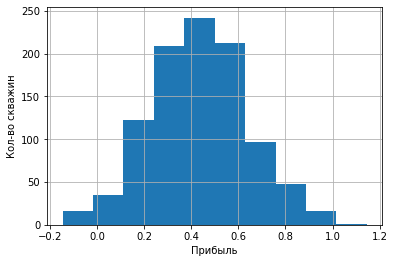

In [ ]:
values = []
values1 = pd.Series(distribution_profit(target1,pred1))
values1.hist()
plt.xlabel('Прибыль')
plt.ylabel('Кол-во скважин')
plt.show()

In [ ]:
values1.describe()

count    1000.000000
mean        0.436120
std         0.206289
min        -0.145867
25%         0.292937
50%         0.437039
75%         0.572603
max         1.145464
dtype: float64

In [ ]:
mean1 = values1.mean()
lower1 = values1.quantile(0.025)
upper1 = values1.quantile(0.975)
risk1 = st.percentileofscore(values1, 0)
print('_______________________________________________________________________________')
print('Средняя прибыль второго региона млрд:',mean1)
print('95% - ый доверительный интервал:')
print('0.025% - ый квантиль',lower1)
print('0.975% - ый квантиль',upper1)
print('Вероятность убытков:',risk1,'%')
print('_______________________________________________________________________________')

_______________________________________________________________________________
Средняя прибыль второго региона млрд: 0.4361195136368177
95% - ый доверительный интервал:
0.025% - ый квантиль 0.02887873265524146
0.975% - ый квантиль 0.8658319125385555
Вероятность убытков: 1.7 %
_______________________________________________________________________________


<b>Распределение прибыли третьего региона</b>

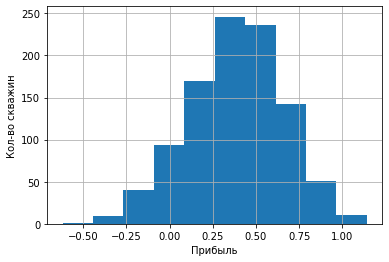

In [ ]:
values = []
values2 = pd.Series(distribution_profit(target2,pred2))
values2.hist()
plt.xlabel('Прибыль')
plt.ylabel('Кол-во скважин')
plt.show()

In [ ]:
values2.describe()

count    1000.000000
mean        0.385038
std         0.275281
min        -0.619131
25%         0.206359
50%         0.402097
75%         0.573986
max         1.141921
dtype: float64

In [ ]:
mean2 = values2.mean()
lower2 = values2.quantile(0.025)
upper2 = values2.quantile(0.975)
risk2 = st.percentileofscore(values2, 0)
print('_______________________________________________________________________________')
print('Средняя прибыль третьего региона млрд:',mean2)
print('95% - ый доверительный интервал:')
print('0.025% - ый квантиль',lower2)
print('0.975% - ый квантиль',upper2)
print('Вероятность убытков:',risk2,'%')
print('_______________________________________________________________________________')

_______________________________________________________________________________
Средняя прибыль третьего региона млрд: 0.3850378680361557
95% - ый доверительный интервал:
0.025% - ый квантиль -0.1858627346571884
0.975% - ый квантиль 0.8854393962295972
Вероятность убытков: 8.6 %
_______________________________________________________________________________


## Вывод
1. По средней прибыли все регионы вписываются в безубыточную разработку скважин.
2. Вероятность убытков меньше 2.5% наблюдается только у второго региона, поэтому он рекомендуемый регион для разработки скважин.
<br>
<table width="70%" align="left">
    <tr>
        <th>Регион</th>
        <th>Средняя прибыль, млрд</th>
        <th>95% дов. инт.</th>
        <th>Вероятность убытков, %</th>
    </tr>
    <tr>
        <th>Первый</th>
        <th>0.4085</th>
        <th>(-0.1386, 0.9524)</th>
        <th>7.4</th>
    </tr>
     <tr>
        <th>Второй</th>
        <th>0.4361</th>
        <th>(0.0288, 0.8658)</th>
         <th>1.7</th>
    </tr>
    <tr>
        <th>Третий</th>
        <th>0.3850</th>
        <th>(-0.1858, 0.8854)</th>
        <th>8.6</th>
    </tr>
</table>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован